Epoch 0, Loss: 0.3018
------------------------------------------------
Epoch 1000, Loss: 0.2771
------------------------------------------------
Epoch 2000, Loss: 0.2694
------------------------------------------------
Epoch 3000, Loss: 0.2621
------------------------------------------------
Epoch 4000, Loss: 0.2604
------------------------------------------------


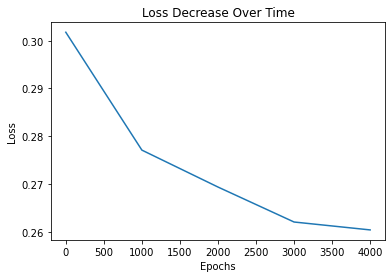

Final Weights and Biases:
W1 (Input to Hidden):
 [[-4.16729478  3.20000452]
 [-7.75605511 -7.66468692]]
b1 (Hidden Layer Bias):
 [[ 0.79025809 -2.33391209]]
W2 (Hidden to Output):
 [[-5.82228997]
 [ 5.20199995]]
b2 (Output Layer Bias):
 [[-0.03096111]]
------------------------------------------------

Training Results:
Input: [[0 0]], Predicted Output: 0   Actual Output: [0]
Input: [[0 1]], Predicted Output: 0   Actual Output: [1]
Input: [[1 0]], Predicted Output: 1   Actual Output: [1]
Input: [[1 1]], Predicted Output: 0   Actual Output: [0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)  # Derivative of the sigmoid function

# Training data (X: input features, y: target output)
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])  # Example: XOR problem with two inputs

y_train = np.array([[0], [1], [1], [0]])  # XOR outputs

# Initialize weights and biases (small random values)
np.random.seed(42)  # For reproducibility
W1 = np.random.uniform(-0.5, 0.5, (2, 2))  # Weights from input to hidden layer
b1 = np.random.uniform(-0.5, 0.5, (1, 2))  # Bias for hidden layer

W2 = np.random.uniform(-0.5, 0.5, (2, 1))  # Weights from hidden to output layer
b2 = np.random.uniform(-0.5, 0.5, (1, 1))  # Bias for output layer

learning_rate = 0.5  # Learning rate η
epochs = 5000  # Number of training iterations

# Store loss values
loss_values = []

# Iterate over each epoch
for epoch in range(epochs):
    # Iterate over each training example (stochastic gradient descent)
    for i in range(len(X_train)):
        # ------------------------------
        # 1. Forward Propagation
        # ------------------------------
        # Input to hidden layer
        x = X_train[i].reshape(1, -1)  # Shape (1, 2)
        hidden_input = np.dot(x, W1) + b1  # z = xW + b
        hidden_output = sigmoid(hidden_input)  # Apply sigmoid

        # Hidden to output layer
        final_input = np.dot(hidden_output, W2) + b2  # z = hidden_output * W2 + b2
        final_output = sigmoid(final_input)  # Apply sigmoid

        # ------------------------------
        # 2. Backward Propagation
        # ------------------------------
        # Calculate output layer error δ_k
        target = y_train[i]  # Get the target output for this example
        error_output = target - final_output  # t_k - o_k
        delta_output = error_output * sigmoid_derivative(final_output)  # δ_k

        # Calculate hidden layer error δ_h
        delta_hidden = (delta_output.dot(W2.T)) * sigmoid_derivative(hidden_output)  # δ_h

        # ------------------------------
        # 3. Update Weights and Biases
        # ------------------------------
        # Update weights from hidden to output layer
        W2 += learning_rate * hidden_output.T.dot(delta_output)  # W2_ij = W2_ij + η * δ_k * o_h

        # Update bias for output layer
        b2 += learning_rate * delta_output  # b_k = b_k + η * δ_k

        # Update weights from input to hidden layer
        W1 += learning_rate * x.T.dot(delta_hidden)  # W1_ij = W1_ij + η * δ_h * x_i

        # Update bias for hidden layer
        b1 += learning_rate * delta_hidden  # b_j = b_j + η * δ_h

        # Store the loss every 1000 epochs
        if epoch % 1000 == 0 and i == len(X_train) - 1:
            loss = np.mean(np.square(error_output))
            loss_values.append(loss)
            print(f'Epoch {epoch}, Loss: {loss:.4f}')
    if epoch % 1000 == 0:
        print("------------------------------------------------")

# Plot the loss values
plt.plot(range(0, epochs, 1000), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Decrease Over Time')
plt.show()

# Final weights and biases after one pass through all examples
print("Final Weights and Biases:")
print("W1 (Input to Hidden):\n", W1)
print("b1 (Hidden Layer Bias):\n", b1)
print("W2 (Hidden to Output):\n", W2)
print("b2 (Output Layer Bias):\n", b2)
print("------------------------------------------------")

# Testing the network on the same examples
print("\nTraining Results:")
for i in range(len(X_train)):
    x = X_train[i].reshape(1, -1)  # Shape (1, 2)
    hidden_input = np.dot(x, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    predicted_output = sigmoid(final_input)

    print(f"Input: {x}, Predicted Output: {int(predicted_output.round().item())}   Actual Output: {y_train[i]}")